In [1]:
# std
import os
import sys
import inspect
import time
import pathlib
from math import sqrt
from math import log2
# packgaes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap

## sklearn
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor
import metro_preprocessing

In [2]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Metro', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '

In [3]:
datapath = get_data_path("Metro", "Metro_Interstate_Traffic_Volume.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Metro/Metro_Interstate_Traffic_Volume.csv')

In [4]:
df_raw = pd.read_csv(datapath)

df_raw
#df_raw = df_raw.sample(3000)

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

# Dataset preparation

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# different holiday

In [6]:
df_raw

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

In [7]:
holiday_list = df_raw.holiday.unique()
holiday_list

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [8]:
for l in holiday_list:
    if l == "None":
        df_raw = df_raw.replace(l,0)
for l in holiday_list:
    if l != "None":
        df_raw = df_raw.replace(l,1)

In [9]:
df_raw


holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0            0  288.28      0.0      0.0          40        Clouds   
1            0  289.36      0.0      0.0          75        Clouds   
2            0  289.58      0.0      0.0          90        Clouds   
3            0  290.13      0.0      0.0          90        Clouds   
4            0  291.14      0.0      0.0          75        Clouds   
...        ...     ...      ...      ...         ...           ...   
48199        0  283.45      0.0      0.0          75        Clouds   
48200        0  282.76      0.0      0.0          90        Clouds   
48201        0  282.73      0.0      0.0          90  Thunderstorm   
48202        0  282.09      0.0      0.0          90        Clouds   
48203        0  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

In [10]:
holiday_list = df_raw.holiday.unique()
holiday_list

array([0, 1])

In [11]:
indexNames = df_raw.index[df_raw.holiday == 1]
df_raw.drop(indexNames , inplace=True)

In [12]:
df_raw

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0            0  288.28      0.0      0.0          40        Clouds   
1            0  289.36      0.0      0.0          75        Clouds   
2            0  289.58      0.0      0.0          90        Clouds   
3            0  290.13      0.0      0.0          90        Clouds   
4            0  291.14      0.0      0.0          75        Clouds   
...        ...     ...      ...      ...         ...           ...   
48199        0  283.45      0.0      0.0          75        Clouds   
48200        0  282.76      0.0      0.0          90        Clouds   
48201        0  282.73      0.0      0.0          90  Thunderstorm   
48202        0  282.09      0.0      0.0          90        Clouds   
48203        0  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48143 rows x 9 columns]

# handling the outlayers
## some distributions

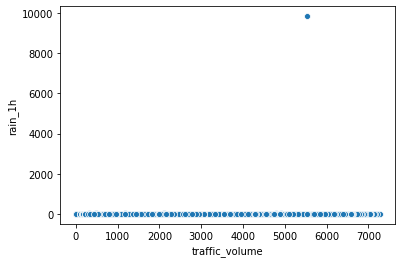

In [13]:
sns.scatterplot(data=df_raw, x="traffic_volume",y="rain_1h")

The minimal temperature in one row is 0.0 Kelvin that is not possible. So the row will delitet and so the one row with the 9831.3 rain.

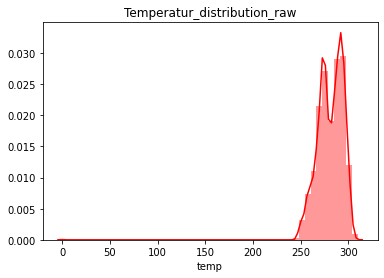

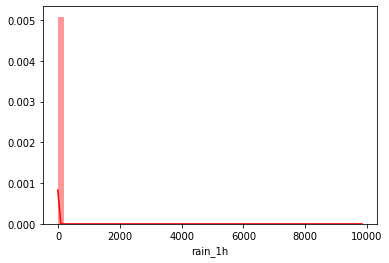

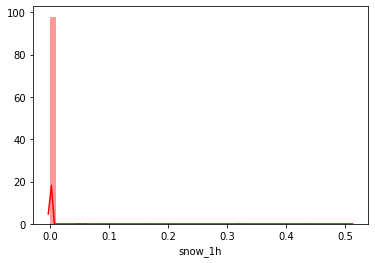

In [14]:
sns.distplot(df_raw["temp"], color="red")
name = "temp"
plt.title("Temperatur_distribution_raw")
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["rain_1h"], color="red")
name = "rain_1h"
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["snow_1h"], color="red")
name = "snow_1h"
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()

## show the outliers

In [15]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  0.0 mean Ttemperatur K:  281.20953212305005
max rain:  9831.3 mean rain:  0.33460876970691483
max snow:  0.51 max snow:  0.0


## clean the dataset by dropping the rows with the outlires

In [16]:
indexNames = df_raw.index[df_raw.temp == np.min(df_raw["temp"])]
df_raw.drop(indexNames , inplace=True)

In [17]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  243.39 mean Ttemperatur K:  281.2679555606341
max rain:  9831.3 mean rain:  0.33467828724575654
max snow:  0.51 max snow:  0.0


In [18]:
indexNames = df_raw.index[df_raw.rain_1h > 300]
df_raw.drop(indexNames , inplace=True)

In [19]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  243.39 mean Ttemperatur K:  281.2675225421757
max rain:  55.63 mean rain:  0.13042819745699327
max snow:  0.51 max snow:  0.0


## looks much better

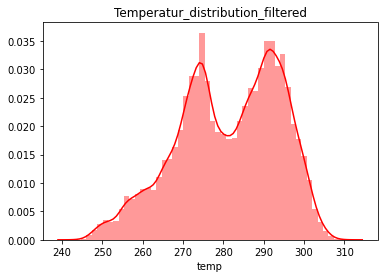

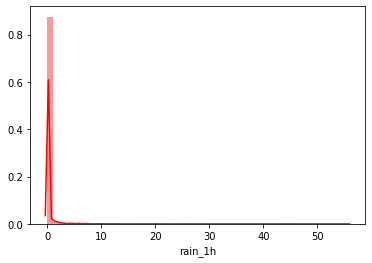

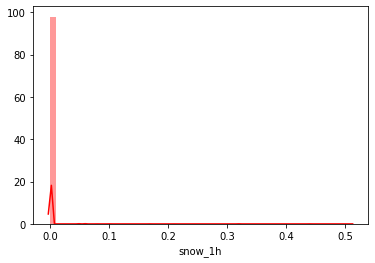

In [20]:
sns.distplot(df_raw["temp"], color="red")
name = "temp"
plt.title("Temperatur_distribution_filtered")
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["rain_1h"], color="red")
name = "rain_1h"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["snow_1h"], color="red")
name = "snow_1h"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()

## converts the date coloum into a better fromat

In [21]:
df_raw["date_time"] = pd.to_datetime(df_raw.date_time)
df_raw["hour"] = df_raw.date_time.dt.hour
df_raw["day"] = df_raw.date_time.dt.day
df_raw["month"] = df_raw.date_time.dt.month
df_raw["year"] = df_raw.date_time.dt.year

df_raw = df_raw.drop("date_time", axis=1)

df_raw

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0            0  288.28      0.0      0.0          40        Clouds   
1            0  289.36      0.0      0.0          75        Clouds   
2            0  289.58      0.0      0.0          90        Clouds   
3            0  290.13      0.0      0.0          90        Clouds   
4            0  291.14      0.0      0.0          75        Clouds   
...        ...     ...      ...      ...         ...           ...   
48199        0  283.45      0.0      0.0          75        Clouds   
48200        0  282.76      0.0      0.0          90        Clouds   
48201        0  282.73      0.0      0.0          90  Thunderstorm   
48202        0  282.09      0.0      0.0          90        Clouds   
48203        0  282.12      0.0      0.0          90        Clouds   

          weather_description  traffic_volume  hour  day  month  year  
0            scattered clouds            5545     9    2     10  2012  
1               broken clouds            4516    10    2     10  2012  
2             overcast clouds            4767    11    2     10  2012  
3             overcast clouds            5026    12    2     10  2012  
4               broken clouds            4918    13    2     10  2012  
...                       ...             ...   ...  ...    ...   ...  
48199           broken clouds            3543    19   30      9  2018  
48200         overcast clouds            2781    20   30      9  2018  
48201  proximity thunderstorm            2159    21   30      9  2018  
48202         overcast clouds            1450    22   30      9  2018  
48203         overcast clouds             954    23   30      9  2018  

[48132 rows x 12 columns]

## code the weather discription into numbers


In [22]:
lsitweather = df_raw.weather_main.unique()
l = 0
for j in lsitweather:
    df_raw = df_raw.replace(j,l)
    l = l + 1

lsitweather = df_raw.weather_description.unique()
l = 0
for j in lsitweather:
    df_raw = df_raw.replace(j,l)
    l = l + 1


In [23]:
df_raw

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0            0  288.28      0.0      0.0          40             0   
1            0  289.36      0.0      0.0          75             0   
2            0  289.58      0.0      0.0          90             0   
3            0  290.13      0.0      0.0          90             0   
4            0  291.14      0.0      0.0          75             0   
...        ...     ...      ...      ...         ...           ...   
48199        0  283.45      0.0      0.0          75             0   
48200        0  282.76      0.0      0.0          90             0   
48201        0  282.73      0.0      0.0          90             7   
48202        0  282.09      0.0      0.0          90             0   
48203        0  282.12      0.0      0.0          90             0   

       weather_description  traffic_volume  hour  day  month  year  
0                        0            5545     9    2     10  2012  
1                        1            4516    10    2     10  2012  
2                        2            4767    11    2     10  2012  
3                        2            5026    12    2     10  2012  
4                        1            4918    13    2     10  2012  
...                    ...             ...   ...  ...    ...   ...  
48199                    1            3543    19   30      9  2018  
48200                    2            2781    20   30      9  2018  
48201                   14            2159    21   30      9  2018  
48202                    2            1450    22   30      9  2018  
48203                    2             954    23   30      9  2018  

[48132 rows x 12 columns]

# Prepare it for the training

In [25]:
df_prep = df_raw

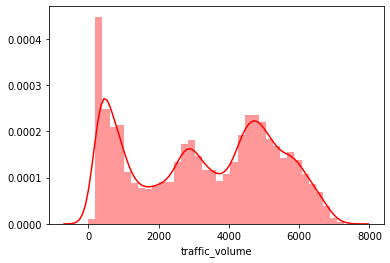

In [26]:
np.mean(df_prep["traffic_volume"])
plot = sns.distplot(df_prep["traffic_volume"], color="red")
name = "traffic"
plt.savefig("out/prep/raw_dist_"+ name +".png")

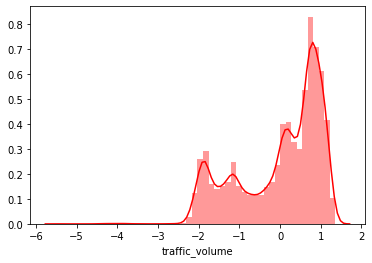

In [27]:
y = df_prep["traffic_volume"]
e = 0.21515151515151515
y_mean = y.apply(lambda x: (x**e)).mean()
transformed = y.apply(lambda x: (x**e)-y_mean)
sns.distplot(transformed,hist=True,color='red')
name = "traffic"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()